<a href="https://colab.research.google.com/github/Zaki1004/Source-Code-Tugas-Akhir/blob/main/DeepLabV3%2B%20dengan%20Unified%20Focal%20Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



BUILDING DeepLabV3+ Xception WITH UNIFIED FOCAL LOSS
Found 5851 images


Loading Data: 100%|██████████| 5851/5851 [1:19:25<00:00,  1.23it/s]


✓ Loaded: 5851 | ✗ Skipped: 0

Training: 4095
Validation: 877
Testing: 879

PIXEL DISTRIBUTION ANALYSIS
Background  :  260,077,712 ( 96.91%)
Pothole     :    4,980,019 (  1.86%)
Crack       :    1,874,664 (  0.70%)
Rutting     :    1,439,376 (  0.54%)

BUILDING MODEL WITH UNIFIED FOCAL LOSS
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
✓ Low-level feature: block1_conv2_act | Shape: (None, 125, 125, 64)
✓ Encoder output: block14_sepconv2_bn | Shape: (None, 8, 8, 2048)

MODEL ARCHITECTURE: DeepLabV3+ (Hadinata et al. 2023)
Input Shape:       (256, 256, 3)
Output Classes:    4
Backbone:          Modified Xception (Pretrained ImageNet)
ASPP Rates:        (6, 12, 18)
Spatial Dropout:   0.2
Low-level Shape:   (None, 125, 125, 48)
Decoder Resize:    ASPP → 125×125 (match low-level)



Model: "DeepLabV3Plus_Xception_Hadinata"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 127, 127,  │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 127, 127,  │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 127, 127,  │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 125, 125,  │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 125, 125,  │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 125, 125,  │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 125, 125,  │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 125, 125,  │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 125, 125,  │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 125, 125,  │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 125, 125,  │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 63, 63,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 63, 63,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 63, 63,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 63, 63,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 63, 63,    │          0 │ add[0][0]       

 Total params: 24,026,780 (91.65 MB)

 Trainable params: 23,968,060 (91.43 MB)

 Non-trainable params: 58,720 (229.38 KB)


UNIFIED FOCAL LOSS (Yeung et al. 2022)
  Variant:    ASYMMETRIC
  Delta (δ):  0.60 (FN priority)
  Gamma (γ):  0.90 (Focusing)
  Lambda (λ): 0.50


MONITORING STRATEGY
PRIMARY: mean_damage_dice (exclude background)
CRITICAL: dice_retakan, dice_rutting
SUCCESS CRITERIA (based on Yeung et al. 2022):

STARTING TRAINING (Epoch 1 to 150)

Epoch 1/150
512/512 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.8557 - dice_background: 0.8527 - dice_coefficient: 0.2764 - dice_lubang: 0.1879 - dice_retakan: 0.0280 - dice_rutting: 0.0368 - iou_metric: 0.2340 - loss: 0.4772 - mean_damage_dice: 0.0843
Epoch 1: val_mean_damage_dice improved from -inf to 0.17465, saving model to /content/drive/MyDrive/New/E-150-DeepLabV3+/deeplabv3+_best_ufl.keras
512/512 ━━━━━━━━━━━━━━━━━━━━ 319s 420ms/step - accuracy: 0.8558 - dice_background: 0.8529 - dice_coefficient: 0.2765 - dice_lubang: 0.1882 - dice_retakan: 0.0281 - dice_rutting: 0.0369 - iou_metric: 0.2341 - loss: 0.4770 - mean_damage_dice: 0.0844 - val_accu

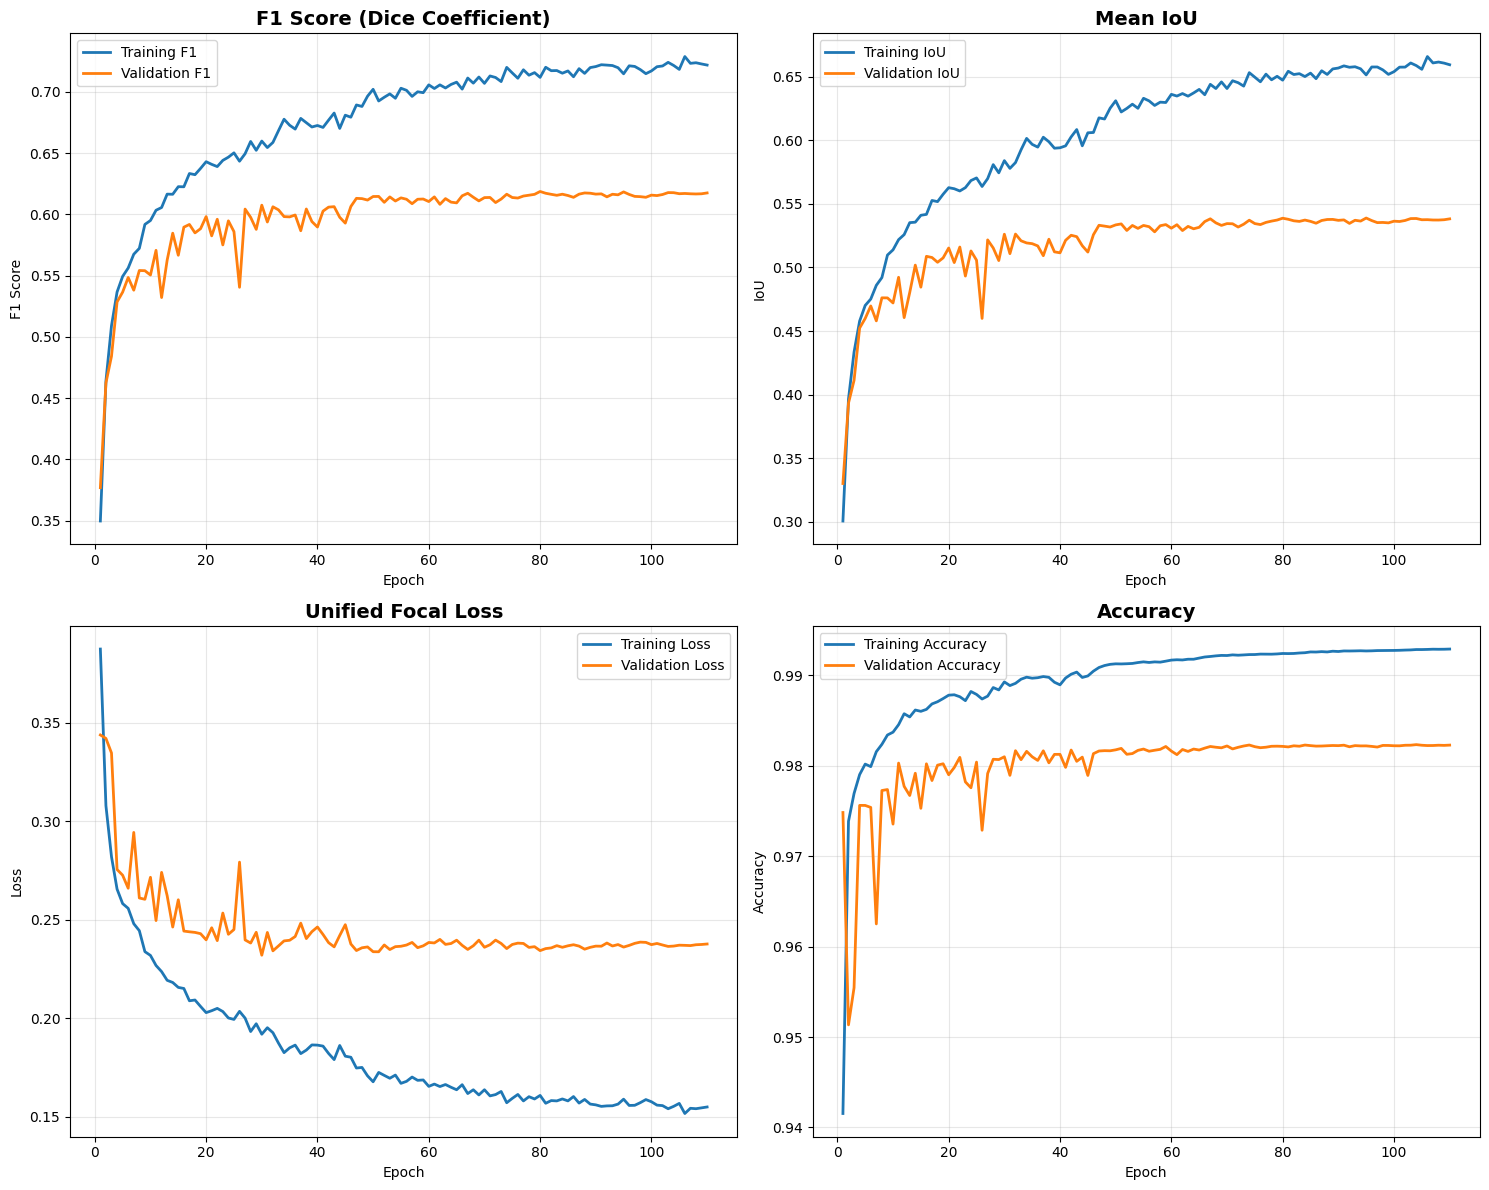


Evaluating model on FINAL TEST set...
✓ Low-level feature: block1_conv2_act | Shape: (None, 125, 125, 64)
✓ Encoder output: block14_sepconv2_bn | Shape: (None, 8, 8, 2048)

MODEL ARCHITECTURE: DeepLabV3+ (Hadinata et al. 2023)
Input Shape:       (256, 256, 3)
Output Classes:    4
Backbone:          Modified Xception (Pretrained ImageNet)
ASPP Rates:        (6, 12, 18)
Spatial Dropout:   0.2
Low-level Shape:   (None, 125, 125, 48)
Decoder Resize:    ASPP → 125×125 (match low-level)

✓ Loaded best weights for final evaluation (DeepLabV3+).
220/220 ━━━━━━━━━━━━━━━━━━━━ 59s 144ms/step

CLASS-SPECIFIC EVALUATION METRICS

Background:
  F1 Score: 0.9901
  IoU:      0.9804

Lubang:
  F1 Score: 0.8083
  IoU:      0.6783

Retakan:
  F1 Score: 0.5082
  IoU:      0.3407

Rutting:
  F1 Score: 0.5890
  IoU:      0.4174

OVERALL METRICS
Mean F1 Score: 0.7239
Mean IoU:      0.6042

✓ Low-level feature: block1_conv2_act | Shape: (None, 125, 125, 64)
✓ Encoder output: block14_sepconv2_bn | Shape: (None

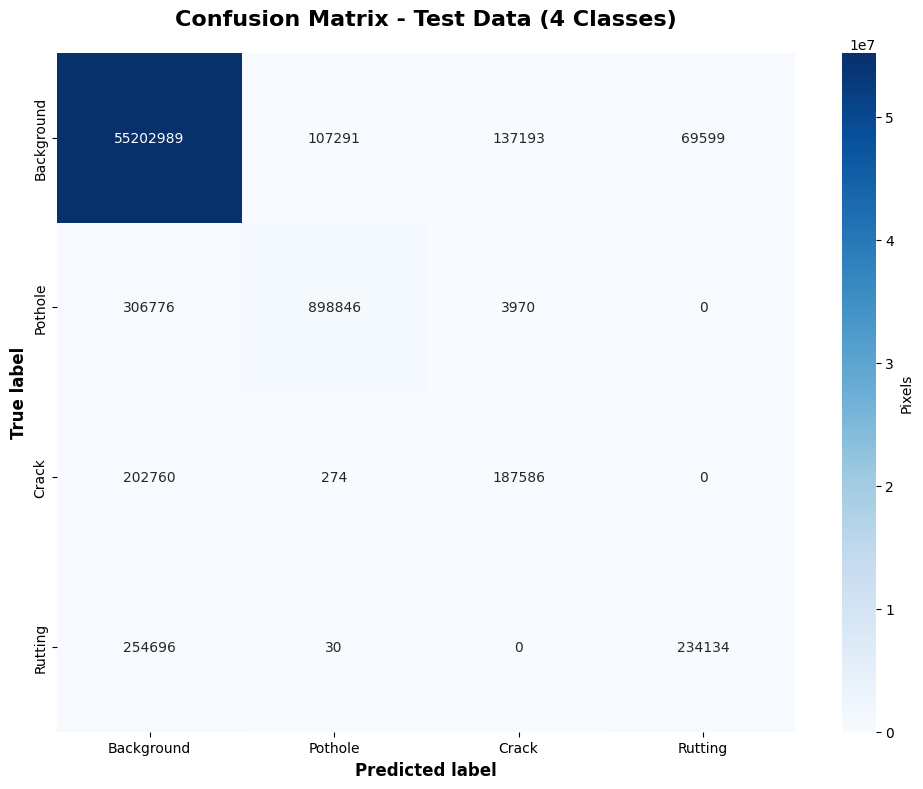


CONFUSION MATRIX STATISTICS

Background:
  TP:        55,202,989
  Precision: 0.9863
  Recall:    0.9943
  F1:        0.9903

Pothole:
  TP:        898,846
  Precision: 0.8931
  Recall:    0.7431
  F1:        0.8112

Crack:
  TP:        187,586
  Precision: 0.5706
  Recall:    0.4802
  F1:        0.5215

Rutting:
  TP:        234,134
  Precision: 0.7709
  Recall:    0.4789
  F1:        0.5908

Visualizing predictions on TEST set...
✓ Low-level feature: block1_conv2_act | Shape: (None, 125, 125, 64)
✓ Encoder output: block14_sepconv2_bn | Shape: (None, 8, 8, 2048)

MODEL ARCHITECTURE: DeepLabV3+ (Hadinata et al. 2023)
Input Shape:       (256, 256, 3)
Output Classes:    4
Backbone:          Modified Xception (Pretrained ImageNet)
ASPP Rates:        (6, 12, 18)
Spatial Dropout:   0.2
Low-level Shape:   (None, 125, 125, 48)
Decoder Resize:    ASPP → 125×125 (match low-level)



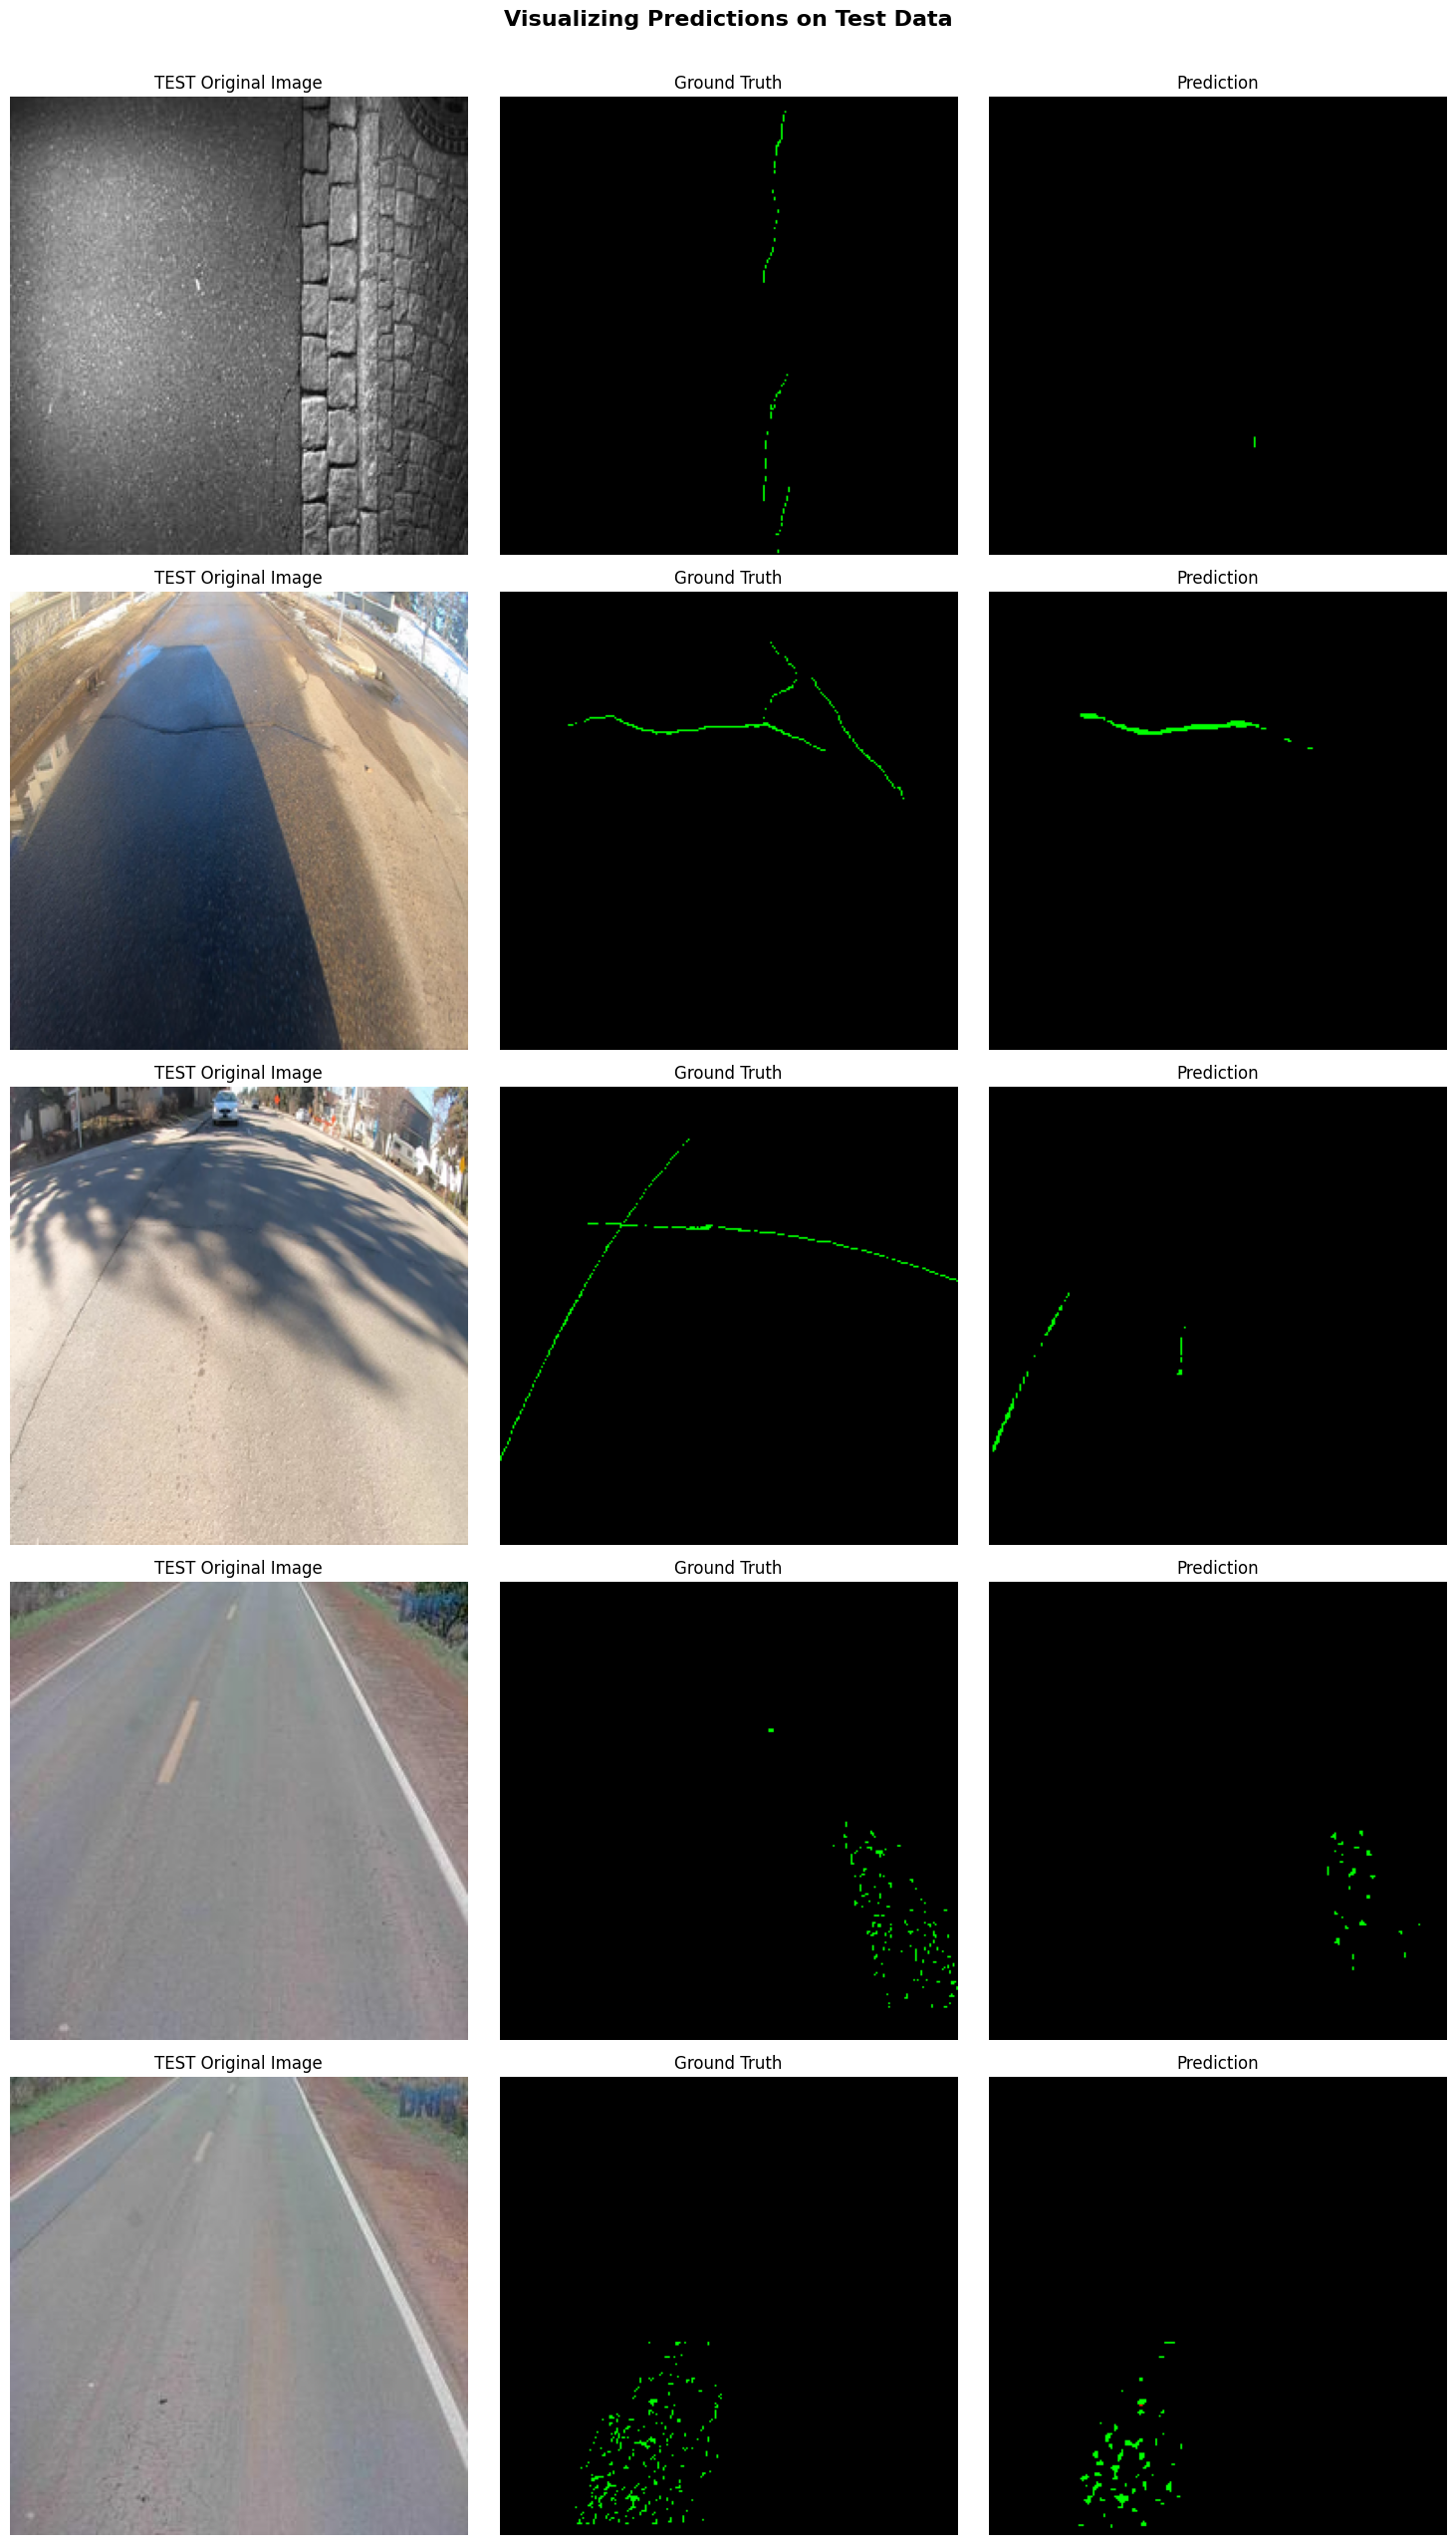


TRAINING COMPLETED & FINAL EVALUATION ON TEST SET DONE!
Best model saved to: /content/drive/MyDrive/New/E-150-DeepLabV3+/deeplabv3+_best_ufl.keras
Training history plot saved to: /content/drive/MyDrive/New/E-150-DeepLabV3+/training_history_256.png
Confusion matrix saved to: /content/drive/MyDrive/New/E-150-DeepLabV3+/confusion_matrix_test_256.png
Prediction visualization saved to: /content/drive/MyDrive/New/E-150-DeepLabV3+/predictions_test.png


In [ ]:
# ========================================
# ROAD DAMAGE SEGMENTATION - UNIFIED FOCAL LOSS VERSION
# Mengadopsi: Yeung et al. (2022) - Unified Focal Loss
# Dataset: 5851 images, 256x256, extreme class imbalance
# ========================================

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob
import json
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tqdm import tqdm

# ========================================
# 1. UNIFIED FOCAL LOSS IMPLEMENTATION
# ========================================

class UnifiedFocalLoss(keras.losses.Loss):
    """Unified Focal Loss (Yeung et al. 2022)"""

    def __init__(self,
                 num_classes=4,
                 delta=0.6,
                 gamma=0.9,
                 lambda_param=0.5,
                 asymmetric=True,
                 smooth=1e-6,
                 name="unified_focal_loss"):
        super().__init__(name=name)

        self.num_classes = num_classes
        self.delta = delta
        self.gamma = gamma
        self.lambda_param = lambda_param
        self.asymmetric = asymmetric
        self.smooth = smooth

        print(f"\n{'='*70}")
        print(f"UNIFIED FOCAL LOSS (Yeung et al. 2022)")
        print(f"{'='*70}")
        print(f"  Variant:    {'ASYMMETRIC' if asymmetric else 'SYMMETRIC'}")
        print(f"  Delta (δ):  {delta:.2f} (FN priority)")
        print(f"  Gamma (γ):  {gamma:.2f} (Focusing)")
        print(f"  Lambda (λ): {lambda_param:.2f}")
        print(f"{'='*70}\n")

    def modified_focal_loss(self, y_true, y_pred):
        """Modified Focal Loss: suppress background"""
        y_pred = tf.clip_by_value(y_pred, self.smooth, 1.0 - self.smooth)
        bce = -y_true * tf.math.log(y_pred)
        p_t = tf.reduce_sum(y_true * y_pred, axis=-1, keepdims=True)

        if self.asymmetric:
            focal_weight_bg = self.delta * tf.pow(1.0 - p_t, 1.0 - self.gamma)
            focal_bg = focal_weight_bg * bce[:, :, :, 0:1]
            focal_rare = self.delta * bce[:, :, :, 1:]
            focal_loss = tf.concat([focal_bg, focal_rare], axis=-1)
        else:
            focal_weight = self.delta * tf.pow(1.0 - p_t, 1.0 - self.gamma)
            focal_loss = focal_weight * bce

        return tf.reduce_mean(tf.reduce_sum(focal_loss, axis=-1))

    def modified_tversky_index(self, y_true, y_pred):
        """Modified Tversky Index"""
        y_true_f = tf.reshape(y_true, [-1, self.num_classes])
        y_pred_f = tf.reshape(y_pred, [-1, self.num_classes])

        tp = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
        fp = tf.reduce_sum((1 - y_true_f) * y_pred_f, axis=0)
        fn = tf.reduce_sum(y_true_f * (1 - y_pred_f), axis=0)

        numerator = tp + self.smooth
        denominator = tp + self.delta * fp + (1.0 - self.delta) * fn + self.smooth

        return numerator / denominator

    def modified_focal_tversky_loss(self, y_true, y_pred):
        """Modified Focal Tversky Loss: enhance minorities"""
        mti = self.modified_tversky_index(y_true, y_pred)

        if self.asymmetric:
            loss_bg = 1.0 - mti[0]
            loss_rare = tf.pow(1.0 - mti[1:], self.gamma)
            focal_tversky = tf.concat([[loss_bg], loss_rare], axis=0)
        else:
            focal_tversky = tf.pow(1.0 - mti, self.gamma)

        return tf.reduce_mean(focal_tversky)

    def call(self, y_true, y_pred):
        """Unified Loss"""
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)

        focal_loss = self.modified_focal_loss(y_true, y_pred)
        focal_tversky_loss = self.modified_focal_tversky_loss(y_true, y_pred)

        return (self.lambda_param * focal_loss +
                (1.0 - self.lambda_param) * focal_tversky_loss)

# ========================================
# 2. UTILITY FUNCTIONS
# ========================================

def combine_histories(history_lama, history_lanjutan):
    """Menggabungkan kamus history dari dua sesi pelatihan"""
    if history_lama is None:
        return history_lanjutan

    combined_history = {}
    keys = history_lama.history.keys()

    for key in keys:
        if key in history_lanjutan.history:
            combined_history[key] = history_lama.history[key] + history_lanjutan.history[key]
        else:
            combined_history[key] = history_lama.history[key]

    tf.keras.callbacks.History().history = combined_history
    return tf.keras.callbacks.History()

# ========================================
# 3. DATA PROCESSOR
# ========================================

class DataProcessor:
    def __init__(self, image_size=(256, 256)):
        self.image_size = image_size

    def load_image(self, path):
        """Load, resize, normalize image ke [-1, 1]"""
        img = cv2.imread(path)
        if img is None:
            return None
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, self.image_size)
        img = (img / 127.5) - 1.0
        return img.astype(np.float32)

    def load_mask(self, path):
        """Load mask RGB dengan mapping warna"""
        mask_rgb = cv2.imread(path, cv2.IMREAD_COLOR)
        if mask_rgb is None:
            return None

        mask_rgb = cv2.cvtColor(mask_rgb, cv2.COLOR_BGR2RGB)
        mask_rgb = cv2.resize(mask_rgb, self.image_size, interpolation=cv2.INTER_NEAREST)

        color_map = {
            (0, 0, 0): 0,      # Background (Hitam)
            (255, 0, 0): 1,    # Lubang (Merah)
            (0, 255, 0): 2,    # Retakan (Hijau)
            (0, 0, 255): 3     # Rutting (Biru)
        }

        mask_labels = np.zeros(self.image_size, dtype=np.uint8)
        for color, label in color_map.items():
            match = np.all(mask_rgb == np.array(color, dtype=np.uint8), axis=-1)
            mask_labels[match] = label

        # One-hot encoding
        mask_onehot = np.zeros((*self.image_size, 4), dtype=np.float32)
        for i in range(4):
            mask_onehot[:, :, i] = (mask_labels == i).astype(np.float32)

        return mask_onehot

    def load_dataset(self, image_dir, mask_dir):
        """Load dataset - Support multiple formats"""
        image_extensions = ['*.jpg', '*.jpeg', '*.png', '*.JPG', '*.JPEG', '*.PNG']
        image_paths = []
        for ext in image_extensions:
            image_paths.extend(glob.glob(os.path.join(image_dir, ext)))

        image_paths = sorted(image_paths)

        if not image_paths:
            print(f"!!! CRITICAL: NO IMAGE FILES in {image_dir}")
            return np.array([]), np.array([])

        print(f"Found {len(image_paths)} images")

        X, y = [], []
        skipped = 0

        for img_path in tqdm(image_paths, desc="Loading Data"):
            base_name = os.path.splitext(os.path.basename(img_path))[0]

            mask_path = None
            for ext in ['.png', '.jpg', '.jpeg', '.PNG', '.JPG', '.JPEG']:
                potential = os.path.join(mask_dir, base_name + ext)
                if os.path.exists(potential):
                    mask_path = potential
                    break

            if mask_path is None:
                skipped += 1
                continue

            try:
                image = self.load_image(img_path)
                mask = self.load_mask(mask_path)

                if image is None or mask is None:
                    skipped += 1
                    continue

                X.append(image)
                y.append(mask)
            except Exception as e:
                skipped += 1

        print(f"✓ Loaded: {len(X)} | ✗ Skipped: {skipped}")
        return np.array(X), np.array(y)

# ========================================
# 4. SPLIT DATA 70/15/15
# ========================================

def split_data_70_15_15(X, y, train_ratio=0.7, val_ratio=0.15, random_state=42):
    """Split data 70/15/15"""
    test_ratio = 1 - train_ratio - val_ratio

    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=(val_ratio + test_ratio), random_state=random_state
    )

    val_test_ratio = val_ratio / (val_ratio + test_ratio)
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=(1 - val_test_ratio), random_state=random_state
    )

    return X_train, y_train, X_val, y_val, X_test, y_test

# ============================
# 6. BUILDER DEEPLABV3+ XCEPTION (FULL)
# ============================
def ASPP_block(x, out_channels=256, rates=(6,12,18)):
    """ASPP dengan depthwise separable conv sesuai Hadinata"""
    branches = []

    # 1x1 conv branch
    b0 = layers.Conv2D(out_channels, 1, padding='same', use_bias=False)(x)
    b0 = layers.BatchNormalization()(b0)
    b0 = layers.Activation('relu')(b0)
    branches.append(b0)

    # atrous separable conv branches
    for r in rates:
        b = layers.SeparableConv2D(out_channels, 3, padding='same', dilation_rate=r, use_bias=False)(x)
        b = layers.BatchNormalization()(b)
        b = layers.Activation('relu')(b)
        branches.append(b)

    # image pooling branch
    img_pool = layers.GlobalAveragePooling2D()(x)
    img_pool = layers.Reshape((1,1,int(img_pool.shape[-1])))(img_pool)
    img_pool = layers.Conv2D(out_channels, 1, padding='same', use_bias=False)(img_pool)
    img_pool = layers.BatchNormalization()(img_pool)
    img_pool = layers.Activation('relu')(img_pool)
    # resize ke ukuran feature map x
    def resize_to_feature(t):
        feature = x
        target_shape = tf.shape(feature)[1:3]
        return tf.image.resize(t, target_shape, method='bilinear')
    img_pool = layers.UpSampling2D(
        size=(x.shape[1], x.shape[2]),
        interpolation="bilinear"
    )(img_pool)
    branches.append(img_pool)

    # concat & project
    x = layers.Concatenate()(branches)
    x = layers.Conv2D(out_channels, 1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    return x

def deeplabv3plus_xception(input_shape=(256,256,3), num_classes=4, dropout_rate=0.2):
    """
    DeepLabV3+ with Modified Xception backbone (Hadinata et al. 2023)
    - Pretrained ImageNet weights
    - ASPP module with depthwise separable convolution
    - Spatial Dropout 0.2 setelah setiap convolution layer
    """
    inputs = layers.Input(shape=input_shape)

    # ========================================
    # ENCODER: Modified Xception (Pretrained)
    # ========================================
    backbone = tf.keras.applications.Xception(
        include_top=False,
        weights='imagenet',
        input_tensor=inputs
    )

    # LOW-LEVEL FEATURE (Output Stride 4)
    # Hadinata: Ambil dari early layer untuk detail spasial
    try:
        # block1 memiliki output stride 4 (256/4 = 64x64)
        low_level = backbone.get_layer("block1_conv2_act").output
        print(f"✓ Low-level feature: block1_conv2_act | Shape: {low_level.shape}")
    except:
        # Fallback ke block2
        low_level = backbone.get_layer("block2_sepconv1_bn").output
        print(f"⚠ Fallback low-level: block2_sepconv1_bn | Shape: {low_level.shape}")

    # HIGH-LEVEL FEATURE (Output Stride 16)
    # Hadinata: Ambil dari block14 sebagai encoder output
    try:
        encoder_output = backbone.get_layer("block14_sepconv2_bn").output
        print(f"✓ Encoder output: block14_sepconv2_bn | Shape: {encoder_output.shape}")
    except:
        encoder_output = backbone.output
        print(f"⚠ Fallback encoder: Final layer | Shape: {encoder_output.shape}")

    # ========================================
    # ASPP MODULE (Atrous Spatial Pyramid Pooling)
    # ========================================
    x = ASPP_block(encoder_output, out_channels=256, rates=(6, 12, 18))

    # Spatial Dropout setelah ASPP (Hadinata: 0.2 rate)
    x = layers.SpatialDropout2D(dropout_rate)(x)

    # ========================================
    # DECODER
    # ========================================

    # Proses low-level feature: reduce channels ke 48
    low = layers.Conv2D(48, 1, padding='same', use_bias=False)(low_level)
    low = layers.BatchNormalization()(low)
    low = layers.Activation('relu')(low)
    low = layers.SpatialDropout2D(dropout_rate)(low)

    # Resize ASPP output agar match dengan low-level feature (125x125)
    # Gunakan Resizing layer (Keras 3.x compatible)
    def get_target_size(low_tensor):
        """Extract spatial dimensions from low-level feature"""
        return (low_tensor.shape[1], low_tensor.shape[2])

    target_h, target_w = get_target_size(low)
    x = layers.Resizing(target_h, target_w, interpolation='bilinear')(x)

    # Concatenate encoder + decoder features (sekarang sama-sama 125x125)
    x = layers.Concatenate()([x, low])

    # Dua blok Depthwise Separable Convolution (sesuai paper)
    # Block 1
    x = layers.SeparableConv2D(256, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(dropout_rate)(x)

    # Block 2
    x = layers.SeparableConv2D(256, 3, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.SpatialDropout2D(dropout_rate)(x)

    # Upsample ke resolusi input (125x125 → 256x256)
    x = layers.Resizing(input_shape[0], input_shape[1], interpolation='bilinear')(x)

    # ========================================
    # OUTPUT HEAD
    # ========================================
    x = layers.Conv2D(num_classes, 1, padding='same')(x)
    outputs = layers.Activation('softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs, name="DeepLabV3Plus_Xception_Hadinata")

    print("\n" + "="*70)
    print("MODEL ARCHITECTURE: DeepLabV3+ (Hadinata et al. 2023)")
    print("="*70)
    print(f"Input Shape:       {input_shape}")
    print(f"Output Classes:    {num_classes}")
    print(f"Backbone:          Modified Xception (Pretrained ImageNet)")
    print(f"ASPP Rates:        (6, 12, 18)")
    print(f"Spatial Dropout:   {dropout_rate}")
    print(f"Low-level Shape:   {low.shape}")
    print(f"Decoder Resize:    ASPP → {target_h}×{target_w} (match low-level)")
    print("="*70 + "\n")

    return model
# ========================================
# 6. EVALUATION METRICS
# ========================================

def dice_background(y_true, y_pred, smooth=1e-6):
    """Dice untuk Background"""
    y_true_f = tf.reshape(y_true[:, :, :, 0], [-1])
    y_pred_f = tf.reshape(y_pred[:, :, :, 0], [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_lubang(y_true, y_pred, smooth=1e-6):
    """Dice untuk Lubang"""
    y_true_f = tf.reshape(y_true[:, :, :, 1], [-1])
    y_pred_f = tf.reshape(y_pred[:, :, :, 1], [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_retakan(y_true, y_pred, smooth=1e-6):
    """Dice untuk Retakan - PRIORITY"""
    y_true_f = tf.reshape(y_true[:, :, :, 2], [-1])
    y_pred_f = tf.reshape(y_pred[:, :, :, 2], [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def dice_rutting(y_true, y_pred, smooth=1e-6):
    """Dice untuk Rutting - PRIORITY"""
    y_true_f = tf.reshape(y_true[:, :, :, 3], [-1])
    y_pred_f = tf.reshape(y_pred[:, :, :, 3], [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2.0 * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)

def mean_damage_dice(y_true, y_pred):
    """Mean Dice dari damage classes (exclude background)"""
    return (dice_lubang(y_true, y_pred) +
            dice_retakan(y_true, y_pred) +
            dice_rutting(y_true, y_pred)) / 3.0

def dice_coefficient(y_true, y_pred, smooth=1e-6):
    """Dice coefficient overall"""
    y_true_f = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred_f = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    union = tf.reduce_sum(y_true_f + y_pred_f, axis=0)
    dice = (2.0 * intersection + smooth) / (union + smooth)
    return tf.reduce_mean(dice)

def iou_metric(y_true, y_pred, smooth=1e-6):
    """IoU metric"""
    y_true_f = tf.reshape(y_true, [-1, tf.shape(y_true)[-1]])
    y_pred_f = tf.reshape(y_pred, [-1, tf.shape(y_pred)[-1]])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    union = tf.reduce_sum(y_true_f + y_pred_f, axis=0) - intersection
    iou = (intersection + smooth) / (union + smooth)
    return tf.reduce_mean(iou)

# ========================================
# 7. TRAINING SETUP
# ========================================

IMAGE_SIZE = (256, 256)
BATCH_SIZE = 8
EPOCHS_TOTAL = 150
LEARNING_RATE = 3e-4  # Naikkan dari 1.5e-4 berdasarkan paper
DROPOUT_RATE = 0.2

# Paths
ALL_IMAGE_DIR = "/content/drive/MyDrive/New/AllDataImagesCleaning"
ALL_MASK_DIR = "/content/drive/MyDrive/New/AllDataMasksCleaning"
OUTPUT_DIR = "/content/drive/MyDrive/New/E-150-DeepLabV3+"
MODEL_SAVE_PATH = os.path.join(OUTPUT_DIR, "deeplabv3+_best_ufl.keras")
HISTORY_SAVE_PATH = os.path.join(OUTPUT_DIR, "training_history_ufl.json")

# Buat folder output
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ========================================
# 8. LOAD DATA
# ========================================

print("\n" + "="*70)
print("BUILDING DeepLabV3+ Xception WITH UNIFIED FOCAL LOSS")
print("="*70)

data_processor = DataProcessor(IMAGE_SIZE)
X_all, y_all = data_processor.load_dataset(ALL_IMAGE_DIR, ALL_MASK_DIR)

if len(X_all) == 0:
    raise ValueError("FATAL: Tidak ada data yang dimuat!")

# Split 70/15/15
X_train, y_train, X_val, y_val, X_test, y_test = split_data_70_15_15(X_all, y_all)

print(f"\nTraining: {len(X_train)}")
print(f"Validation: {len(X_val)}")
print(f"Testing: {len(X_test)}")

# ========================================
# 9. PIXEL DISTRIBUTION ANALYSIS
# ========================================

print("\n" + "="*70)
print("PIXEL DISTRIBUTION ANALYSIS")
print("="*70)

total_pixels = len(y_train) * IMAGE_SIZE[0] * IMAGE_SIZE[1]
class_names = ['Background', 'Pothole', 'Crack', 'Rutting']

for i, name in enumerate(class_names):
    count = np.sum(y_train[:, :, :, i])
    percentage = (count / total_pixels) * 100
    print(f"{name:12s}: {count:12,.0f} ({percentage:6.2f}%)")

# ========================================
# 10. BUILD & COMPILE MODEL
# ========================================

print("\n" + "="*70)
print("BUILDING MODEL WITH UNIFIED FOCAL LOSS")
print("="*70)

model = deeplabv3plus_xception(input_shape=(*IMAGE_SIZE,3), num_classes=4)


# Load weights jika ada
if os.path.exists(MODEL_SAVE_PATH):
    try:
        model.load_weights(MODEL_SAVE_PATH)
        print(f"✓ Loaded existing weights from {MODEL_SAVE_PATH}")
    except Exception as e:
        print(f"⚠ Failed to load weights: {e}")

model.summary()

# Compile dengan Unified Focal Loss
# HYPERPARAMETER TUNING: Coba gamma = [0.3, 0.5, 0.7]
GAMMA_VALUE = 0.9  # ⭐ TUNABLE: Start dengan 0.5 (paper's recommendation)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    loss=UnifiedFocalLoss(
        num_classes=4,
        delta=0.6,          # Prioritas recall (paper: 0.6)
        gamma=GAMMA_VALUE,  # Focusing strength (paper: 0.5)
        lambda_param=0.5,   # Equal weight Focal-Tversky (paper: 0.5)
        asymmetric=True     # RECOMMENDED untuk extreme imbalance
    ),
    metrics=[
        'accuracy',
        dice_coefficient,
        iou_metric,
        dice_background,
        dice_lubang,
        dice_retakan,      # ⭐⭐ CRITICAL
        dice_rutting,      # ⭐⭐ CRITICAL
        mean_damage_dice   # ⭐⭐⭐ MAIN METRIC
    ]
)

print("\n" + "="*70)
print("MONITORING STRATEGY")
print("="*70)
print("PRIMARY: mean_damage_dice (exclude background)")
print("CRITICAL: dice_retakan, dice_rutting")
print("SUCCESS CRITERIA (based on Yeung et al. 2022):")
print("="*70)

# ========================================
# 11. CALLBACKS
# ========================================

# Paper menggunakan patience yang lebih besar
callbacks = [
    ModelCheckpoint(
        MODEL_SAVE_PATH,
        monitor='val_mean_damage_dice',
        mode='max',
        save_best_only=True,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_mean_damage_dice',
        mode='max',
        patience=30,  # Paper: lebih besar dari 20-25
        verbose=1,
        restore_best_weights=True,
        min_delta=0.001
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=15,
        min_lr=1e-7,
        verbose=1,
        cooldown=5
    )
]

# ========================================
# 12. TRAINING
# ========================================

history_lama = None
start_epoch = 0

if os.path.exists(HISTORY_SAVE_PATH):
    try:
        with open(HISTORY_SAVE_PATH, 'r') as f:
            history_dict = json.load(f)
        history_lama = tf.keras.callbacks.History()
        history_lama.history = history_dict
        start_epoch = len(history_lama.history['loss'])
        print(f"Resuming from Epoch {start_epoch + 1}")
    except Exception as e:
        print(f"⚠ Could not load history: {e}")

if start_epoch >= EPOCHS_TOTAL:
    print(f"Training completed ({start_epoch} epochs)")
    history_gabungan = history_lama
else:
    print(f"\n{'='*70}")
    print(f"STARTING TRAINING (Epoch {start_epoch+1} to {EPOCHS_TOTAL})")
    print(f"{'='*70}\n")

    history_lanjutan = model.fit(
        X_train, y_train,
        batch_size=BATCH_SIZE,
        epochs=EPOCHS_TOTAL,
        initial_epoch=start_epoch,
        validation_data=(X_val, y_val),
        callbacks=callbacks,
        verbose=1
    )

    history_gabungan = combine_histories(history_lama, history_lanjutan)

    with open(HISTORY_SAVE_PATH, 'w') as f:
        json.dump(history_gabungan.history, f)
    print(f"\n✓ History saved to {HISTORY_SAVE_PATH}")

print("\n" + "="*70)
print("TRAINING COMPLETED!")
print("="*70)
print("\nNEXT STEPS:")
print("1. Check validation metrics at epoch 20, 40, 60")
print("2. If dice_retakan/rutting < 0.10 at epoch 20:")
print("   -> Increase gamma to 0.7 or 0.9")
print("3. If overfitting (val_loss ↑, train_loss ↓):")
print("   -> Decrease gamma to 0.3")
print("4. Run evaluation on test set")
print("="*70)

# ========================================
# 8. PLOTTING RESULTS
# ========================================
def plot_training_history(history_gabungan):
    """Plot training curves"""
    if history_gabungan is None or not history_gabungan.history:
        print("Plotting dibatalkan karena tidak ada riwayat training yang valid.")
        return

    fig, axes = plt.subplots(2, 2, figsize=(15, 12))

    # Ambil indeks Epoch (0 hingga N-1) dan tambahkan 1 agar mulai dari 1
    epochs = range(1, len(history_gabungan.history['loss']) + 1)

    # F1 Score (Dice Coefficient)
    axes[0, 0].plot(epochs, history_gabungan.history['dice_coefficient'], label='Training F1', linewidth=2)
    axes[0, 0].plot(epochs, history_gabungan.history['val_dice_coefficient'], label='Validation F1', linewidth=2)
    axes[0, 0].set_title('F1 Score (Dice Coefficient)', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch'); axes[0, 0].set_ylabel('F1 Score'); axes[0, 0].legend(); axes[0, 0].grid(True, alpha=0.3)

    # IoU
    axes[0, 1].plot(epochs, history_gabungan.history['iou_metric'], label='Training IoU', linewidth=2)
    axes[0, 1].plot(epochs, history_gabungan.history['val_iou_metric'], label='Validation IoU', linewidth=2)
    axes[0, 1].set_title('Mean IoU', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch'); axes[0, 1].set_ylabel('IoU'); axes[0, 1].legend(); axes[0, 1].grid(True, alpha=0.3)

    # Loss
    axes[1, 0].plot(epochs, history_gabungan.history['loss'], label='Training Loss', linewidth=2)
    axes[1, 0].plot(epochs, history_gabungan.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1, 0].set_title('Unified Focal Loss', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch'); axes[1, 0].set_ylabel('Loss'); axes[1, 0].legend(); axes[1, 0].grid(True, alpha=0.3)

    # Accuracy
    axes[1, 1].plot(epochs, history_gabungan.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[1, 1].plot(epochs, history_gabungan.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[1, 1].set_title('Accuracy', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch'); axes[1, 1].set_ylabel('Accuracy'); axes[1, 1].legend(); axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(os.path.join(OUTPUT_DIR, 'training_history_256.png'), dpi=300, bbox_inches='tight')
    plt.show()

plot_training_history(history_gabungan)

# ========================================
# 9. EVALUATION
# ========================================
def evaluate_per_class(model, X_data, y_data):
    """Evaluasi per class pada set data tertentu"""
    if len(X_data) == 0:
        print("Evaluation dibatalkan karena data pengujian kosong.")
        return

      # Muat model DeepLabV3+ terbaik
    if os.path.exists(MODEL_SAVE_PATH):
        try:
            final_model = deeplabv3plus_xception(
                input_shape=(*IMAGE_SIZE, 3),
                num_classes=4,
            )
            final_model.load_weights(MODEL_SAVE_PATH)
            print("✓ Loaded best weights for final evaluation (DeepLabV3+).")
            model_to_evaluate = final_model
        except Exception as e:
            print(f"⚠ Gagal load best model, menggunakan current model. Error: {e}")
            model_to_evaluate = model
    else:
        print("⚠ Best model weights tidak ditemukan, menggunakan current model.")
        model_to_evaluate = model

    y_pred = model_to_evaluate.predict(X_data, batch_size=4)

    # REVISI 11: Update class_names sesuai label baru
    class_names = ['Background', 'Lubang', 'Retakan', 'Rutting']
    print("\n" + "="*60)
    print("CLASS-SPECIFIC EVALUATION METRICS")
    print("="*60)

    for i, class_name in enumerate(class_names):
        y_true_class = y_data[:, :, :, i].flatten()
        y_pred_class = y_pred[:, :, :, i].flatten()

        intersection = np.sum(y_true_class * y_pred_class)
        union = np.sum(y_true_class + y_pred_class)

        dice = (2.0 * intersection + 1e-6) / (union + 1e-6)
        iou = (intersection + 1e-6) / (union - intersection + 1e-6)

        print(f"\n{class_name}:")
        print(f"  F1 Score: {dice:.4f}")
        print(f"  IoU:      {iou:.4f}")

    # Overall metrics
    y_pred_tensor = tf.convert_to_tensor(y_pred)
    y_data_tensor = tf.convert_to_tensor(y_data)
    mean_dice = dice_coefficient(y_data, y_pred_tensor).numpy()
    mean_iou = iou_metric(y_data, y_pred_tensor).numpy()

    print(f"\n{'='*60}")
    print(f"OVERALL METRICS")
    print(f"{'='*60}")
    print(f"Mean F1 Score: {mean_dice:.4f}")
    print(f"Mean IoU:      {mean_iou:.4f}")
    print(f"{'='*60}\n")

print("\nEvaluating model on FINAL TEST set...")
evaluate_per_class(model, X_test, y_test)

# ========================================
# 10. CONFUSION MATRIX
# ========================================
def plot_confusion_matrix(model, X_data, y_data, class_names, output_path, title="Confusion Matrix"):
    if len(X_data) == 0:
        print("No data for confusion matrix")
        return

    print("\nGenerating confusion matrix...")
    y_pred = model.predict(X_data, batch_size=4, verbose=1)

    y_true_labels = np.argmax(y_data, axis=-1).flatten()
    y_pred_labels = np.argmax(y_pred, axis=-1).flatten()

    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=[0, 1, 2, 3])

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Pixels'})

    plt.title(title, fontsize=16, fontweight='bold', pad=20)
    plt.ylabel('True label', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted label', fontsize=12, fontweight='bold')
    plt.tight_layout()

    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f"✓ Confusion matrix saved: {output_path}")
    plt.show()

    print("\n" + "="*60)
    print("CONFUSION MATRIX STATISTICS")
    print("="*60)
    for i, name in enumerate(class_names):
        total_true = np.sum(cm[i, :])
        total_pred = np.sum(cm[:, i])
        correct = cm[i, i]

        precision = correct / total_pred if total_pred > 0 else 0
        recall = correct / total_true if total_true > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        print(f"\n{name}:")
        print(f"  TP:        {correct:,}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall:    {recall:.4f}")
        print(f"  F1:        {f1:.4f}")
    print("="*60)

# REVISI 12: Update class_names untuk confusion matrix
class_names = ['Background', 'Pothole', 'Crack', 'Rutting']

if os.path.exists(MODEL_SAVE_PATH):
    try:
        best_model = deeplabv3plus_xception(input_shape=(*IMAGE_SIZE, 3), num_classes=4)
        best_model.load_weights(MODEL_SAVE_PATH)
        model_for_cm = best_model
    except:
        model_for_cm = model
else:
    model_for_cm = model

print("\n" + "="*60)
print("GENERATING CONFUSION MATRIX")
print("="*60)
# REVISI 13: Update nama file output dari 512 ke 256
cm_path = os.path.join(OUTPUT_DIR, 'confusion_matrix_test_256.png')
plot_confusion_matrix(model_for_cm, X_test, y_test, class_names, cm_path, "Confusion Matrix - Test Data (4 Classes)")

# ========================================
# 11. VISUALIZATION
# ========================================
def visualize_predictions(model, X_data, y_data, num_samples=5, title_prefix=""):
    """Visualisasi prediksi"""
    if len(X_data) == 0:
        print("Visualisasi dibatalkan karena data kosong.")
        return

    if os.path.exists(MODEL_SAVE_PATH):
        try:
            final_model = deeplabv3plus_xception(input_shape=(*IMAGE_SIZE, 3), num_classes=4)
            final_model.load_weights(MODEL_SAVE_PATH)
            model_to_predict = final_model
        except:
            model_to_predict = model
    else:
        model_to_predict = model

    indices = np.random.choice(len(X_data), num_samples, replace=False)
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5*num_samples))

    # REVISI 14: Update color_map sesuai label baru
    # Merah = Lubang, Hijau = Retakan, Biru = Rutting
    color_map = {
        1: [255, 0, 0],      # Lubang - Red
        2: [0, 255, 0],      # Retakan - Green
        3: [0, 0, 255]       # Rutting - Blue
    }

    for idx, i in enumerate(indices):
        # Original image
        img = (X_data[i] + 1.0) / 2.0  # Denormalize
        axes[idx, 0].imshow(img)
        axes[idx, 0].set_title(f'{title_prefix} Original Image')
        axes[idx, 0].axis('off')

        # Ground truth
        gt_mask = np.argmax(y_data[i], axis=-1)
        gt_colored = np.zeros((*gt_mask.shape, 3), dtype=np.uint8)
        for class_id, color in color_map.items():
            gt_colored[gt_mask == class_id] = color
        axes[idx, 1].imshow(gt_colored)
        axes[idx, 1].set_title('Ground Truth')
        axes[idx, 1].axis('off')

        # Prediction
        pred = model_to_predict.predict(X_data[i:i+1], verbose=0)[0]
        pred_mask = np.argmax(pred, axis=-1)
        pred_colored = np.zeros((*pred_mask.shape, 3), dtype=np.uint8)
        for class_id, color in color_map.items():
            pred_colored[pred_mask == class_id] = color
        axes[idx, 2].imshow(pred_colored)
        axes[idx, 2].set_title('Prediction')
        axes[idx, 2].axis('off')

    plt.tight_layout()
    plt.suptitle(f'Visualizing Predictions on Test Data', y=1.02, fontsize=16, fontweight='bold')
    plt.savefig(os.path.join(OUTPUT_DIR, f'predictions_{title_prefix.lower()}.png'), dpi=300, bbox_inches='tight')
    plt.show()

print("\nVisualizing predictions on TEST set...")
visualize_predictions(model, X_test, y_test, num_samples=5, title_prefix="TEST")

print("\n" + "="*60)
print("TRAINING COMPLETED & FINAL EVALUATION ON TEST SET DONE!")
print("="*60)
print(f"Best model saved to: {MODEL_SAVE_PATH}")
print(f"Training history plot saved to: {os.path.join(OUTPUT_DIR, 'training_history_256.png')}")
print(f"Confusion matrix saved to: {os.path.join(OUTPUT_DIR, 'confusion_matrix_test_256.png')}")
print(f"Prediction visualization saved to: {os.path.join(OUTPUT_DIR, 'predictions_test.png')}")